# Arboles de regresión y clasificación: ventajas e incovenientes

## Ventajas

* Son fáciles de interpretar
* Manejan fácilmente entradas mixtas, discretas y continuas
* Son insensibles a transformaciones monótonas de las entradas ya que los puntos de split se basan en la ordenación de los datos, por lo que no es necesario estandarizarlos
* Realizan selección de variables automáticamente
* De ajuste rápido y fácil escalado a grandes conjuntos de datos
* Pueden manejar caracterı́sticas de entrada perdidas

## Incovenientes

* No son muy precisos, debido en parte a su construcción voraz
* **Inestabilidad:** pequeños cambios en los datos de entrada pueden tener grandes consecuencias en la estructura del árbol

**Ejemplo:** inestabilidad con iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
ndx = [2, 3]  # petal length and width
X = iris.data[:, ndx]
y = iris.target

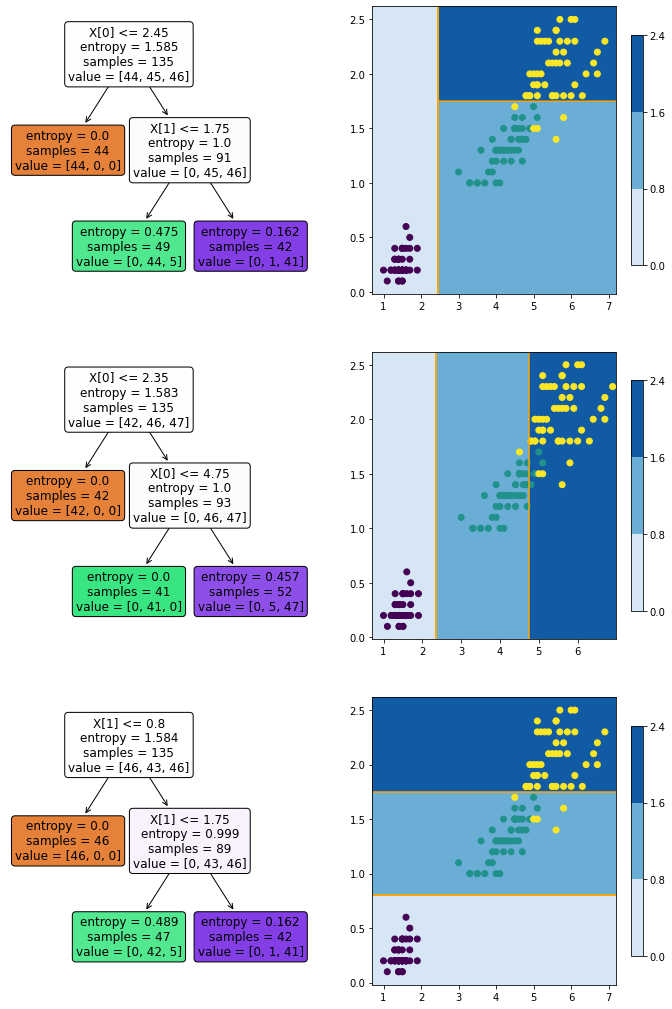

In [2]:
nrows = 3
fig, axes = plt.subplots(nrows, 2, figsize=(12, 6 * nrows))
for n in np.arange(nrows):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train, y_train)
    plot_tree(dt, filled=True, rounded=True, ax=axes[n, 0], fontsize=12);
    ax = axes[n, 1]; ax.scatter(*X_train.T, c=y_train); x_min, x_max = ax.get_xlim(); y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=1000), np.linspace(y_min, y_max, num=1000))
    zz = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    ax.contour(xx, yy, zz.reshape(xx.shape), 2, colors='orange', linestyles='solid')
    cp = ax.contourf(xx, yy, zz.reshape(xx.shape), 2, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.8); ax.scatter(*X.T, c=y);